## 타이타닉데이터 전처리

In [1]:
import pandas as pd #판다스 패키지
import numpy as np # 넘파이 패키지
import seaborn as sns #시본 시각화할 때 사용
import matplotlib.pyplot as plt # 시각화할 때 사용
%matplotlib inline # Plt사용시 show 없이 바로 그림 보여주려는 코드

In [2]:
tt=sns.load_dataset('titanic')

In [3]:
tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 데이터 전처리를 하는 이유는?
### 목적에 따라 전처리를 하는 이유가 달라진다!
- 내가 원하는 데이터 분석을 하기 위한 경우 ! 
- 데이터 가공을 통해서 필요한 것을 보려고 !
- 모델링을 하기 위해서 전처리를 진행하는 경우 ! -> 모델링시에는 문자열데이터는 읽을 수 없으니 모두 다 숫자로 변형하는 작업이 필요하다
- 모델링을 진행하기 위해서 내가 사용할 피처들을 정해야 하고 피처를 전처리 해야 하는 경우
- 인코딩, 스케일링, 엔지니어링 등등 여러가지 존재

### 모델링을 하기 위한 전처리를 진행할 예정!
- 타이타닉 그당시 승객 데이터를 가지고 생존율에 대해서 컬럼이 있다. survived , 1이면 생존이고 0이면 생존하지 못함
- 1,0 이진분류로 예측하는 모델링을 진행한다.

### 모델링을 하기 위한 전처리를 진행하면서 우리가 중요하게 생각해야 하는 부분?!
- 정답데이터를 학습시키는 것 -> 정답이 있는 지도학습
- 정답과의 관계를 통해서 survived 피처와 다른 피처들의 관계를 통해서 머신러닝으로 학습시키고 예측하는 것!
- y값과 다른 피처들의 관계가 정말정말 중요하다.

-----  
- 피처를 선택할 때는 꼭 Y값의 관계를 잘 확인하고 피처를 선택해야 하는 경우가 있다.
- 7기 파문응 우리반을 우수학회원 예시
- 정답이 있다. 1개월 전의 우수학회원 현황 
- 과제 제출율  - 우수학회원 9 과제제출율 만점 1명은 과제제출율이 낮고 우수학회원 아니다
- 안경을 쓴 유무 - 우수학회원 6명은 안경쓰고 4명은 안경을쓰지 않았다.
- 성별 유무 - 우수학회원은 여성이 9명 남성이 1명
- 대학생 유무 - 우수학회원 대학생은 10명 우수학회원 0명
- 시계를 차고 수업을 들었는지? - 우수학회원은 7명 우수학회원이 아닌 경우 3명
- 시계를 찬 것도 결국 중요한 피처구나?
- 데이터 분석가의 도메인 지식, 무작정 수치적인 피처로만 이해하고 선택을하게 되면 놓치는 부분이 생긴다.
- 일반화를 통해 배치형태로 진행할텐데-> 데이터 분석가의 도메인의 이해와 함께 피처를  선정하는 것도 정말 중요합니다.
----
- 통계적인 기법, 확률적인 기법도 있다.

### 반복문을 통한 기술적인 접근!

In [4]:
tt['alive']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: object

In [10]:
tt['alive_num'] = 0
def binom_pre(df):
    for i in range(len(df['alive'])):
        if df['alive'].loc[i] == 'no':
            df['alive_num'].loc[i] = 0
        else:
            df['alive_num'].loc[i] = 1
            
    return df

In [12]:
df_tt =binom_pre(tt)

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_9768/3473083748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alive_num'].loc[i] = 0
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_9768/3473083748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alive_num'].loc[i] = 1


In [9]:
tt.alive_num.value_counts()

alive_num
0    891
Name: count, dtype: int64

In [13]:
df_tt.alive_num.value_counts()

alive_num
0    549
1    342
Name: count, dtype: int64

In [16]:
tt.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alive_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


## 필수과제1 seaborn 데이터셋으로 진행!
- sex
- embark_town
- embarked

- 위의 세 컬럼을 값 자체가 1,0 이 아닌 3가지이상이면 (고윳값) 1,2,3 인코딩 진행 
- 새로운 컬럼을 만들기!

In [15]:
tt.embark_town.value_counts() # 문자형 데이터 값과 카운팅을 확인하고 진행해 주세요!

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### 새로운 타이타닉 데이터 전처리 진행!

In [18]:
train_df= pd.read_csv('train.csv')

In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

- 수치형, 문자형 데이터
- 이 데이터따라서 접근하고 분석하는 방법이 다 다르다!

In [21]:
train_df.describe() #통계치를 보는 기본적인 방법

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_df.describe(include=['O']) #문자형 데이터 확인

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Y값 (Survived) 과 다른 컬럼들의 관계를 살펴보려고 한다!

In [27]:
#pclass, survived 관계
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [28]:
train_df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


### 필수과제2 (train.csv 파일로 진행!)
- Pclass, Sex의 외에 다른 컬럼들도 추가적으로 groupby해서 어떤 컬럼이 중요한 컬럼일지 생각하고 정리해 주세요!

### 시각화를 통해 컬럼을 선정하기!

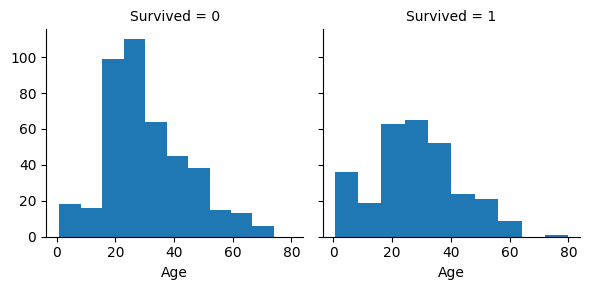

In [30]:
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Age')

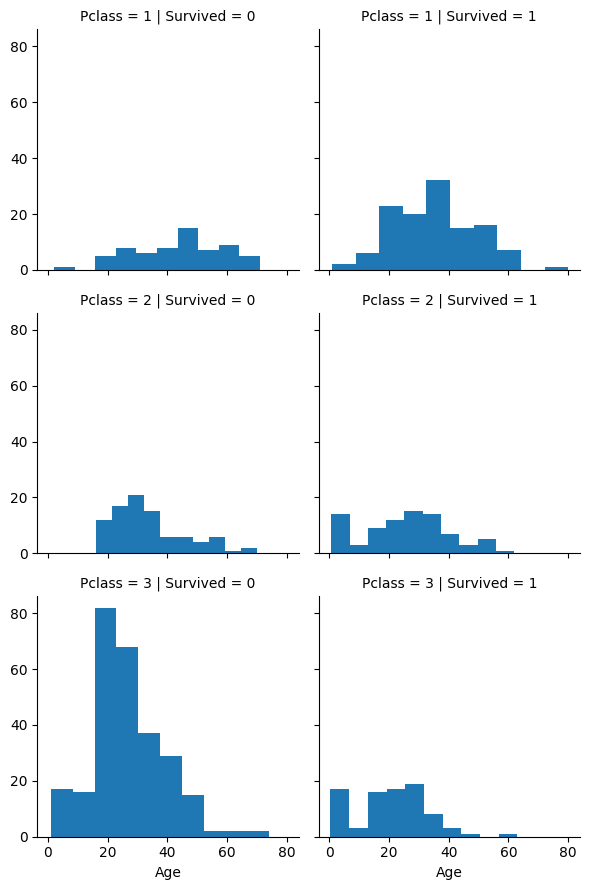

In [31]:
# 생존과, pclass age관계를 한 번에 시각화로 살펴보기!
g2 = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g2.map(plt.hist, 'Age')

### 필수과제3 시각화한 모든 그래프 그려보기!
- 위의 그래프를 그려서 다른 컬럼들과의 관계도 살펴보고
- 실제로 주석처리로 정리하여 해당 그래프의 해석을 써주세요!

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


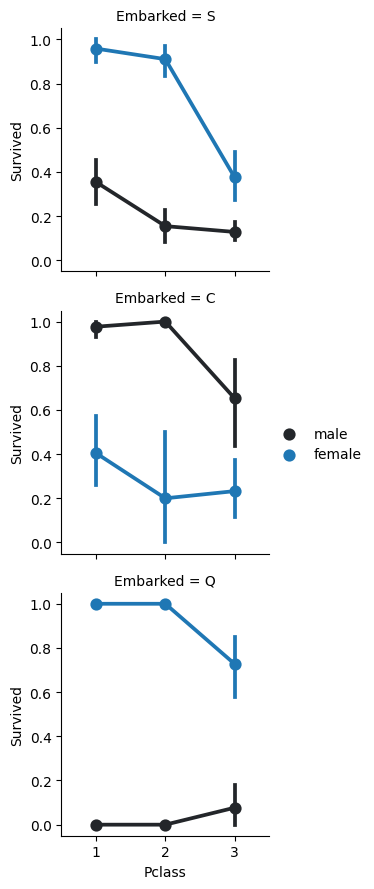

In [34]:
# 생존과, pclass age관계를 한 번에 시각화로 살펴보기!
g3 = sns.FacetGrid(train_df, row='Embarked')
g3.map(sns.pointplot, 'Pclass','Survived','Sex')
g3.add_legend()

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


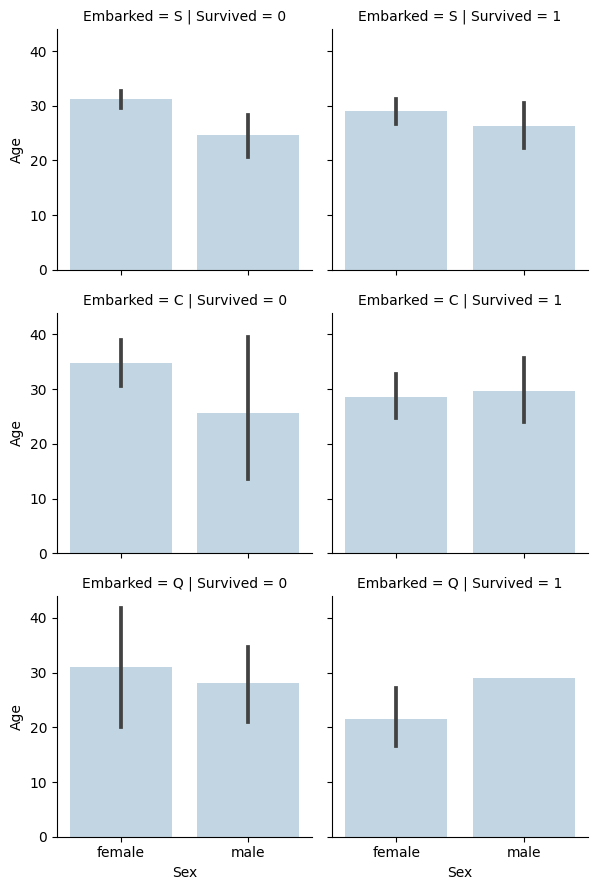

In [38]:
# 생존과, pclass age관계를 한 번에 시각화로 살펴보기!
g4 = sns.FacetGrid(train_df, col='Survived', row='Embarked')
g4.map(sns.barplot, 'Sex','Age',alpha=0.3)
g4.add_legend()